In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
num_elements = 1000000
large_list = list(range(num_elements))

print(large_list[:5])  # list indexing as usual
print(large_list[-5:])

[0, 1, 2, 3, 4]
[999995, 999996, 999997, 999998, 999999]


In [43]:
np.sum?

Signature:      
np.sum(
    a,
    axis=None,
    dtype=None,
    out=None,
    keepdims=<no value>,
    initial=<no value>,
    where=<no value>,
)
Call signature:  np.sum(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function sum at 0x000001E69C73AD40>
File:            c:\users\alyss\anaconda3\envs\ppchem\lib\site-packages\numpy\core\fromnumeric.py
Docstring:      
Sum of array elements over a given axis.

Parameters
----------
a : array_like
    Elements to sum.
axis : None or int or tuple of ints, optional
    Axis or axes along which a sum is performed.  The default,
    axis=None, will sum all of the elements of the input array.  If
    axis is negative it counts from the last to the first axis.

    .. versionadded:: 1.7.0

    If axis is a tuple of ints, a sum is performed on all of the axes
    specified in the tuple instead of a single axis or all the axes as
    before.
dtype : dtype, optional
    The type of the returned array and of the accu

In [6]:
def sum_python_loop(data) -> float:
    """Sum the elements in `data` using a for loop"""
    total = 0
    for x in data:
        total += x
    return total
def sum_numpy(data) -> float:
    """Sum the elements in `data` using numpy"""
    return np.sum(data)

In [7]:
%%timeit
sum_python_loop(large_list)

47.5 ms ± 3.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [8]:
large_array = np.arange(num_elements)

print(large_array[:5])  # array indexing just like list indexing
print(large_array[-5:])

[0 1 2 3 4]
[999995 999996 999997 999998 999999]


In [9]:
%%timeit
sum_python_loop(large_array)

C:\Users\alyss\AppData\Local\Temp\ipykernel_13304\2893128288.py:5: RuntimeWarning: overflow encountered in scalar add
  total += x


93.1 ms ± 4.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [10]:
%%timeit
sum_numpy(large_array)

488 µs ± 237 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [11]:
list_a = list(range(1000000))
list_b = list(range(1, 1000001))

def add_python_loop(list1: list, list2: list) -> list:
    return [x + y for x, y in zip(list1, list2)]

In [12]:
%%timeit  # now time it
add_python_loop(list_a, list_b)

93.9 ms ± 3.66 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [13]:
array_a = np.arange(1000000)  # integers from 0 to 999999
array_b = np.arange(1, 1000001)  # integers from 1 to 1000000

def add_numpy_arrays(array_1: np.ndarray, array_2: np.ndarray) -> np.ndarray:
    return array_1 + array_2  # you can just use the + operator here!

In [14]:
# See what the function returns
new_array = add_numpy_arrays(array_a, array_b)
print(new_array[:10])

# Use the `.shape` attribute to see the shapes of the arrays
print(array_a.shape, array_b.shape, new_array.shape)

[ 1  3  5  7  9 11 13 15 17 19]
(1000000,) (1000000,) (1000000,)


In [15]:
%%timeit  # now time it
add_numpy_arrays(array_a, array_b)

3.29 ms ± 1.67 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [16]:
%%timeit  # now time it
add_numpy_arrays(array_a, array_b)

3.04 ms ± 1.61 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [45]:
matrix = np.array([[1, 2, 3], [4, 5, 6]])
print(matrix)

zeros_array = np.zeros((2, 3))
print(zeros_array)

ones_array = np.ones((3, 3, 3))
print(ones_array)

range_array = np.arange(12).reshape(3, 4)
print(range_array)


[[1 2 3]
 [4 5 6]]
[[0. 0. 0.]
 [0. 0. 0.]]
[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [46]:
one_d_array = np.arange(6)
two_d_array = one_d_array.reshape((2, 3))
print(one_d_array)
print(two_d_array)

[0 1 2 3 4 5]
[[0 1 2]
 [3 4 5]]


In [47]:
one_d_array = np.arange(6)
two_d_array = one_d_array.reshape((2, 3))
print(one_d_array)
print(two_d_array)

[0 1 2 3 4 5]
[[0 1 2]
 [3 4 5]]


In [48]:
np.loadtxt(r"C:\Users\alyss\ppchem\molecular_data.txt", delimiter=',', skiprows=1)

ValueError: could not convert string 'Water' to float64 at row 0, column 1.

In [50]:
np.loadtxt(r"C:\Users\alyss\ppchem\molecular_data.txt", delimiter=',', skiprows=1, dtype=str)

array([['Water', '18.015', '100.0'],
       ['Carbon Dioxide', '44.01', '-78.5'],
       ['Methane', '16.04', '-161.5'],
       ['Ethanol', '46.07', '78.3'],
       ['Oxygen', '32.00', '-183.0'],
       ['Nitrogen', '28.01', '-196.0'],
       ['Hydrogen Peroxide', '34.01', '150.2'],
       ['Ammonia', '17.03', '-33.3'],
       ['Sulfuric Acid', '98.09', '337.0'],
       ['Acetic Acid', '60.05', '118.1'],
       ['Methanol', '32.04', '64.7'],
       ['Benzene', '78.11', '80.1'],
       ['Ethylene', '28.05', '-103.7'],
       ['Propane', '44.10', '-42.1'],
       ['Butane', '58.12', '-0.5'],
       ['Pentane', '72.15', '36.1'],
       ['Hexane', '86.18', '68.7'],
       ['Heptane', '100.20', '98.4'],
       ['Octane', '114.22', '125.7'],
       ['Nonane', '128.25', '150.8'],
       ['Decane', '142.28', '174.1'],
       ['Caffeine', '194.19', '178.0'],
       ['Ethane', '30.07', '-88.6']], dtype='<U17')

In [51]:
names = np.loadtxt(r"C:\Users\alyss\ppchem\molecular_data.txt", delimiter=',', skiprows=1, usecols=[0], dtype=str)
molecular_weights = np.loadtxt(r"C:\Users\alyss\ppchem\molecular_data.txt", delimiter=',', skiprows=1, usecols=[1], dtype=np.float64)

print("Names:")
print(names)
print("Molecular Weights (g/mol):")
print(molecular_weights)

Names:
['Water' 'Carbon Dioxide' 'Methane' 'Ethanol' 'Oxygen' 'Nitrogen'
 'Hydrogen Peroxide' 'Ammonia' 'Sulfuric Acid' 'Acetic Acid' 'Methanol'
 'Benzene' 'Ethylene' 'Propane' 'Butane' 'Pentane' 'Hexane' 'Heptane'
 'Octane' 'Nonane' 'Decane' 'Caffeine' 'Ethane']
Molecular Weights (g/mol):
[ 18.015  44.01   16.04   46.07   32.     28.01   34.01   17.03   98.09
  60.05   32.04   78.11   28.05   44.1    58.12   72.15   86.18  100.2
 114.22  128.25  142.28  194.19   30.07 ]


In [54]:
max_value = np.max(molecular_weights)
min_value = np.min(molecular_weights)


mean_value = np.mean(molecular_weights)
std_value = np.std(molecular_weights)

print(f"Max: {max_value}, Min: {min_value}, Mean: {mean_value}, Std: {std_value}")

Max: 194.19, Min: 16.04, Mean: 65.27326086956522, Std: 45.39299739158912


In [2]:
compounds = pd.Series(["Water", "Ethanol", "Glucose", "Sodium Chloride", "Methane"])
compounds

0              Water
1            Ethanol
2            Glucose
3    Sodium Chloride
4            Methane
dtype: object

In [3]:
data = {
    "Compound": ["Water", "Ethanol", "Glucose", "Sodium Chloride", "Methane"],
    "Molecular Weight": [18.015, 46.07, 180.16, 58.44, 16.04],
    "Melting Point (°C)": [0, -114.1, 146, 801, -182.5]
}
df = pd.DataFrame(data)
df

,Compound,Molecular Weight,Melting Point (°C)
0,Water,18.015,0.0
1,Ethanol,46.070,-114.1
2,Glucose,180.160,146.0
3,Sodium Chloride,58.440,801.0
4,Methane,16.040,-182.5


In [7]:
df = pd.read_csv(r"C:\Users\alyss\ppchem\molecular_data.txt", )
df

,# Compound Name,Molecular Weight (g/mol),Boiling Point (°C)
0,Water,18.015,100.0
1,Carbon Dioxide,44.010,-78.5
2,Methane,16.040,-161.5
3,Ethanol,46.070,78.3
4,Oxygen,32.000,-183.0
5,Nitrogen,28.010,-196.0
6,Hydrogen Peroxide,34.010,150.2
7,Ammonia,17.030,-33.3
8,Sulfuric Acid,98.090,337.0
9,Acetic Acid,60.050,118.1


In [8]:
df.columns

Index(['# Compound Name', 'Molecular Weight (g/mol)', 'Boiling Point (°C)'], dtype='object')

In [11]:
df["Molecular Weight (g/mol)"]

0      18.015
1      44.010
2      16.040
3      46.070
4      32.000
5      28.010
6      34.010
7      17.030
8      98.090
9      60.050
10     32.040
11     78.110
12     28.050
13     44.100
14     58.120
15     72.150
16     86.180
17    100.200
18    114.220
19    128.250
20    142.280
21    194.190
22     30.070
Name: Molecular Weight (g/mol), dtype: float64

In [12]:
df = pd.read_csv(r"C:\Users\alyss\ppchem\molecular_data.txt", names=["molecule", "weight", "boiling_point_celsius"], skiprows=1)
df

,molecule,weight,boiling_point_celsius
0,Water,18.015,100.0
1,Carbon Dioxide,44.010,-78.5
2,Methane,16.040,-161.5
3,Ethanol,46.070,78.3
4,Oxygen,32.000,-183.0
5,Nitrogen,28.010,-196.0
6,Hydrogen Peroxide,34.010,150.2
7,Ammonia,17.030,-33.3
8,Sulfuric Acid,98.090,337.0
9,Acetic Acid,60.050,118.1


In [13]:
df["weight"]

0      18.015
1      44.010
2      16.040
3      46.070
4      32.000
5      28.010
6      34.010
7      17.030
8      98.090
9      60.050
10     32.040
11     78.110
12     28.050
13     44.100
14     58.120
15     72.150
16     86.180
17    100.200
18    114.220
19    128.250
20    142.280
21    194.190
22     30.070
Name: weight, dtype: float64

In [14]:
df.describe()

,weight,boiling_point_celsius
count,23.000000,23.000000
mean,65.273261,37.956522
std,46.413192,132.381971
min,16.040000,-196.000000
25%,31.035000,-60.300000
50%,46.070000,68.700000
75%,92.135000,121.900000
max,194.190000,337.000000


In [15]:
df.loc[1]

molecule                 Carbon Dioxide
weight                            44.01
boiling_point_celsius             -78.5
Name: 1, dtype: object

In [16]:
df.loc[[0, 10]]

,molecule,weight,boiling_point_celsius
0,Water,18.015,100.0
10,Methanol,32.040,64.7


In [17]:
df.iloc[[0, 2]]

,molecule,weight,boiling_point_celsius
0,Water,18.015,100.0
2,Methane,16.040,-161.5


In [18]:
df[df["molecule"] == "Water"]

,molecule,weight,boiling_point_celsius
0,Water,18.015,100.0


In [19]:
hydrocarbons = [
    "Methane",
    "Ethane",
    "Propane",
    "Butane",
    "Pentane",
    "Hexane",
    "Heptane",
    "Octane",
    "Nonane",
    "Decane",
]

df[df["molecule"].isin(hydrocarbons)]

,molecule,weight,boiling_point_celsius
2,Methane,16.04,-161.5
13,Propane,44.10,-42.1
14,Butane,58.12,-0.5
15,Pentane,72.15,36.1
16,Hexane,86.18,68.7
17,Heptane,100.20,98.4
18,Octane,114.22,125.7
19,Nonane,128.25,150.8
20,Decane,142.28,174.1
22,Ethane,30.07,-88.6


In [20]:
molecular_weights = df["weight"]

print("Max molecular weight:", molecular_weights.max())
print("Min molecular weight:", molecular_weights.min())

print("Mean molecular weight (pandas):", molecular_weights.mean())
print("Mean molecular weight (numpy):", np.mean(molecular_weights))

print("Standard deviation of molecular weight (pandas):", molecular_weights.std())
print("Standard deviation of molecular weight (numpy):", np.std(molecular_weights))

Max molecular weight: 194.19
Min molecular weight: 16.04
Mean molecular weight (pandas): 65.27326086956522
Mean molecular weight (numpy): 65.27326086956522
Standard deviation of molecular weight (pandas): 46.413192129567285
Standard deviation of molecular weight (numpy): 45.39299739158912


In [21]:
df["boiling_point_kelvin"] = df["boiling_point_celsius"].apply(lambda x: x + 274.15)
df

,molecule,weight,boiling_point_celsius,boiling_point_kelvin
0,Water,18.015,100.0,374.15
1,Carbon Dioxide,44.010,-78.5,195.65
2,Methane,16.040,-161.5,112.65
3,Ethanol,46.070,78.3,352.45
4,Oxygen,32.000,-183.0,91.15
5,Nitrogen,28.010,-196.0,78.15
6,Hydrogen Peroxide,34.010,150.2,424.35
7,Ammonia,17.030,-33.3,240.85
8,Sulfuric Acid,98.090,337.0,611.15
9,Acetic Acid,60.050,118.1,392.25


In [22]:
df.sort_values(by="boiling_point_celsius")

,molecule,weight,boiling_point_celsius,boiling_point_kelvin
5,Nitrogen,28.010,-196.0,78.15
4,Oxygen,32.000,-183.0,91.15
2,Methane,16.040,-161.5,112.65
12,Ethylene,28.050,-103.7,170.45
22,Ethane,30.070,-88.6,185.55
1,Carbon Dioxide,44.010,-78.5,195.65
13,Propane,44.100,-42.1,232.05
7,Ammonia,17.030,-33.3,240.85
14,Butane,58.120,-0.5,273.65
15,Pentane,72.150,36.1,310.25


In [23]:
df.sort_values(by="boiling_point_celsius", ascending=False)

,molecule,weight,boiling_point_celsius,boiling_point_kelvin
8,Sulfuric Acid,98.090,337.0,611.15
21,Caffeine,194.190,178.0,452.15
20,Decane,142.280,174.1,448.25
19,Nonane,128.250,150.8,424.95
6,Hydrogen Peroxide,34.010,150.2,424.35
18,Octane,114.220,125.7,399.85
9,Acetic Acid,60.050,118.1,392.25
0,Water,18.015,100.0,374.15
17,Heptane,100.200,98.4,372.55
11,Benzene,78.110,80.1,354.25


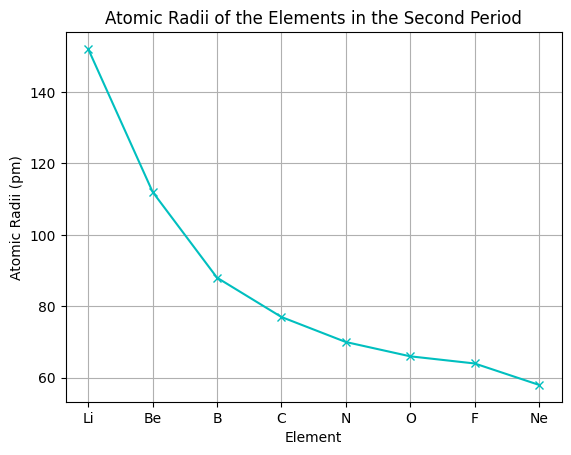

In [25]:
elements = ['Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne']
atomic_radii = [152, 112, 88, 77, 70, 66, 64, 58]

fig, ax = plt.subplots()
ax.plot(elements, atomic_radii, marker='x', linestyle='-', color='c')
ax.set_title('Atomic Radii of the Elements in the Second Period')
ax.set_xlabel('Element')
ax.set_ylabel('Atomic Radii (pm)')
ax.grid(True)


Text(0, 0.5, 'Ionization Energy (eV)')

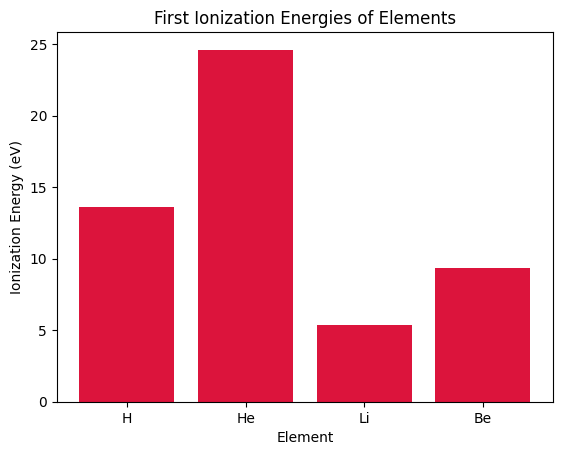

In [27]:
elements = ['H', 'He', 'Li', 'Be']
ionization_energies = [13.6, 24.6, 5.39, 9.32]  # in eV

fig, ax = plt.subplots()
ax.bar(elements, ionization_energies, color='crimson')
ax.set_title('First Ionization Energies of Elements')
ax.set_xlabel('Element')
ax.set_ylabel('Ionization Energy (eV)')

C:\Users\alyss\AppData\Local\Temp\ipykernel_21132\760921256.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hcarbons_df["num_carbons"] = [hydrocarbons[name] for name in hcarbons_df["molecule"]]


,molecule,weight,boiling_point_celsius,num_carbons
2,Methane,16.04,-161.5,1
13,Propane,44.10,-42.1,3
14,Butane,58.12,-0.5,4
15,Pentane,72.15,36.1,5
16,Hexane,86.18,68.7,6
17,Heptane,100.20,98.4,7
18,Octane,114.22,125.7,8
19,Nonane,128.25,150.8,9
20,Decane,142.28,174.1,10
22,Ethane,30.07,-88.6,2


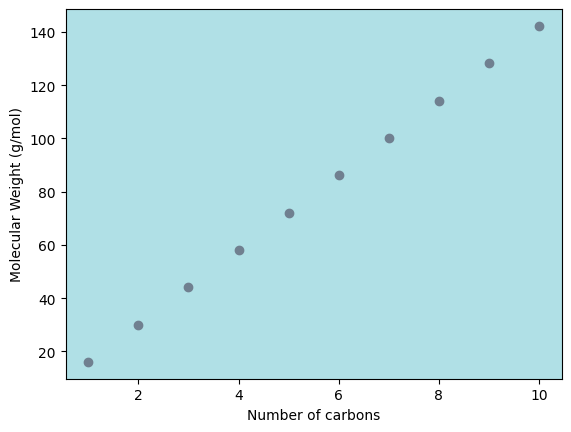

In [42]:
# Load the data from before
file_path = r"C:\Users\alyss\ppchem\molecular_data.txt"
df = pd.read_csv(file_path, names=["molecule", "weight", "boiling_point_celsius"], skiprows=1)
df

# Create a sub-dataframe for the linear hydrocarbons. First, let's create a dictionary
# to map the names to the number of carbons.
hydrocarbons = {
    "Methane": 1,
    "Ethane": 2,
    "Propane": 3,
    "Butane": 4,
    "Pentane": 5,
    "Hexane": 6,
    "Heptane": 7,
    "Octane": 8,
    "Nonane": 9,
    "Decane": 10,

}
hcarbons_df = df[df["molecule"].isin(hydrocarbons.keys())]

# Add this as a column in the dataframe
hcarbons_df["num_carbons"] = [hydrocarbons[name] for name in hcarbons_df["molecule"]]
display(hcarbons_df)

# Plot the molecular weight against the number of carbons
fig, ax = plt.subplots()
ax.scatter(hcarbons_df["num_carbons"], hcarbons_df["weight"], color="slategrey")

# Add axes titles and labels
ax.set_xlabel("Number of carbons")
ax.set_ylabel("Molecular Weight (g/mol)")
ax.set_facecolor("powderblue")


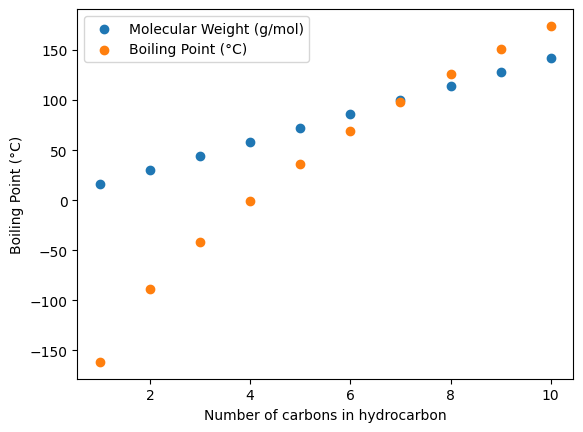

In [34]:
fig, ax = plt.subplots()
ax.scatter(hcarbons_df["num_carbons"], hcarbons_df["weight"], label="Molecular Weight (g/mol)")
ax.scatter(hcarbons_df["num_carbons"], hcarbons_df["boiling_point_celsius"], label="Boiling Point (°C)")

# Add a title and labels
ax.set_xlabel("Number of carbons in hydrocarbon")
ax.set_ylabel("Molecular Weight (g/mol)")
ax.set_ylabel("Boiling Point (°C)")
ax.legend()

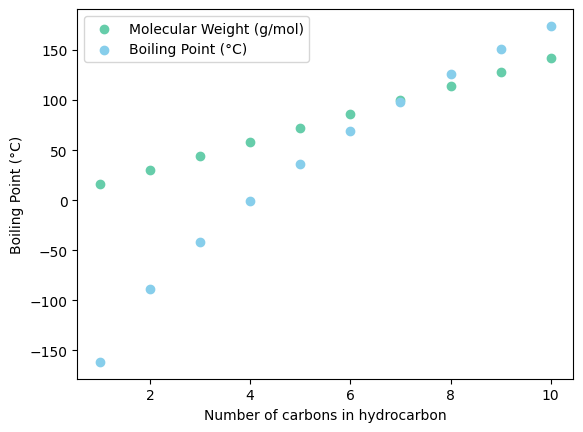

In [40]:
# Plot both the molecular weight and boiling point on the same plot, using a secondary
# axis
plt.scatter(hcarbons_df["num_carbons"], hcarbons_df["weight"], label="Molecular Weight (g/mol)", color = "mediumaquamarine")
plt.scatter(hcarbons_df["num_carbons"], hcarbons_df["boiling_point_celsius"], label="Boiling Point (°C)", color = "skyblue")

# Add a title and labels
plt.xlabel("Number of carbons in hydrocarbon")
plt.ylabel("Molecular Weight (g/mol)")
plt.ylabel("Boiling Point (°C)")
plt.legend()